In [11]:
%cd /data/bruingjde/on-going/SNAM2021-code/

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

networks = [network for network in np.arange(1, 31) if network not in [15, 17, 26, 27]]

def get_performance(network: int, nswap_perc: int = 0, feature_set: str = 'II-A', model: str = 'LogisticRegression'):
    with open(f'data/{network:02}/{nswap_perc:+04.0f}/properties/{feature_set}_{model}.float') as file:
        return float(file.read())

/data/bruingjde/on-going/SNAM2021-code


In [12]:
info = pd.read_json('networks.jsonl', lines=True).set_index('index')
df = pd.DataFrame({
    'Domain': info['category'],
    'Static topological features (AUC)': {network: get_performance(network, feature_set='I') for network in networks},
    'Temporal topological features (AUC)': {network: get_performance(network, feature_set='II-A') for network in networks},
}).dropna()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


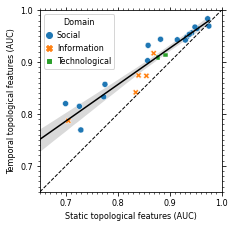

In [13]:
xlabel = "Static topological features (AUC)"
ylabel = 'Temporal topological features (AUC)'

auc_values = df[[ylabel, xlabel]].values.flatten()
lim = (min(auc_values), 1)

fontsize=8
rc = {
  'xtick.top': True, 'ytick.right': True, 'figure.figsize': (3.30,3.3), 
  'axes.titlesize': fontsize, 
  'axes.labelsize': fontsize, 
  'xtick.labelsize': fontsize, 
  'ytick.labelsize': fontsize, 
  'legend.fontsize': fontsize, 
  'legend.title_fontsize': fontsize,
  'lines.linewidth': 1,
#   'lines.markersize': 4,
  'legend.handlelength': .4,
  'font.family': 'sans-serif',
  'font.sans-serif': 'Helvetica',
  'savefig.transparent': True
}

with plt.rc_context(rc):
    ax = sns.regplot(data=df, x=xlabel, y=ylabel, scatter=False, color='black')
    sns.scatterplot(data=df, x=xlabel, y=ylabel, hue='Domain', style='Domain', ax=ax)
    ax.axline((0,0), (1,1), ls='--', c='black')
    ax.axis('scaled')
    ax.axis([.65, 1, .65, 1])
    ax.set_xlabel('Static topological features (AUC)')
    ax.set_ylabel('Temporal topological features (AUC)')
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
    ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))
    #   plt.legend()
    plt.tight_layout()
#     plt.savefig('code/figures/output/Fig3.pdf')